In [321]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [322]:
# dataset source: 
# https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing
# Reading csv from file
# This is a dataset with bikes rented every hour in the South Korean city of Seoul
df = pd.read_csv("SeoulBikeData.csv",index_col=0)
df
# There are 8760 rows, dividing by 24 hours gives exactly 365 days
# Thus it's exactly a full year of hourly data 

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [323]:
# Counting NaN values
print(f"Total number of NaN in Dataframe:\n{df.isnull().sum().sum()}")
# Data seems to be complete without any missing values
# Seems very usable

Total number of NaN in Dataframe:
0


In [324]:
df.describe()
# Getting an idea of the data in each column
# data has very different ranges, so it will have to be scaled for the neural network

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [325]:
# Resetting index to set a normal index
# instead of the date column
df = df.reset_index()
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


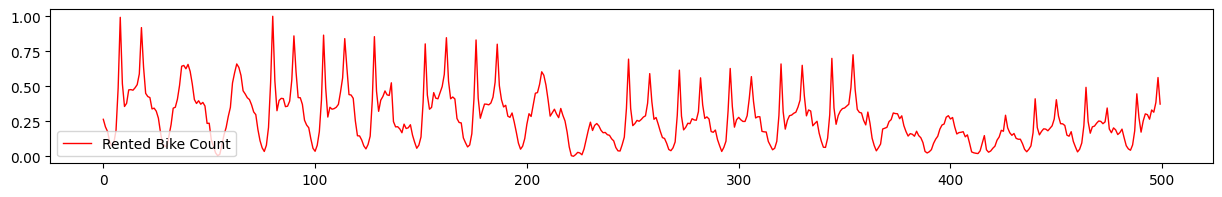

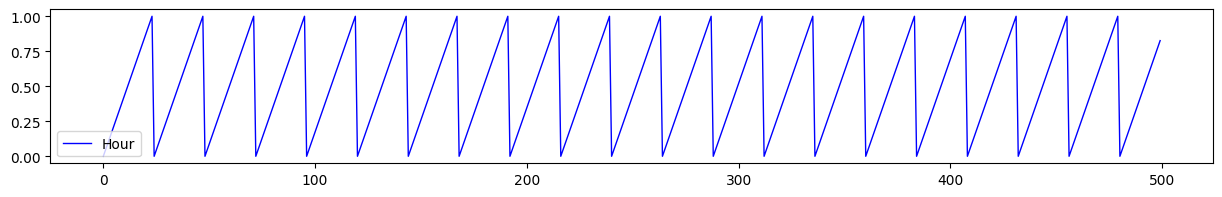

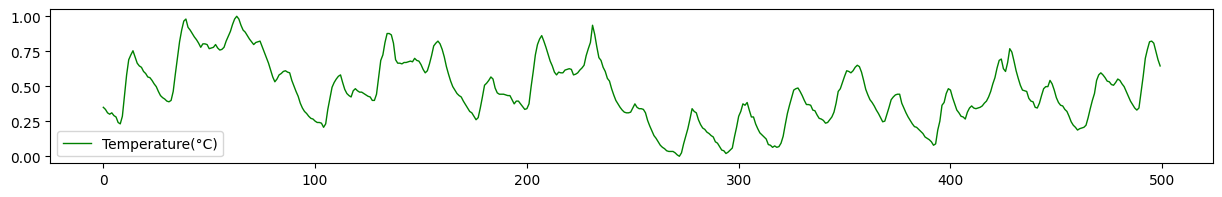

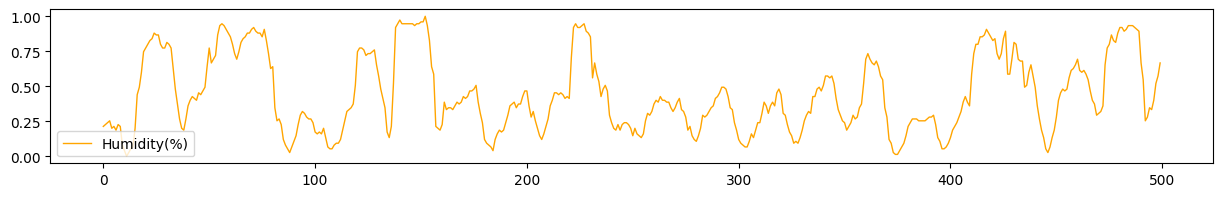

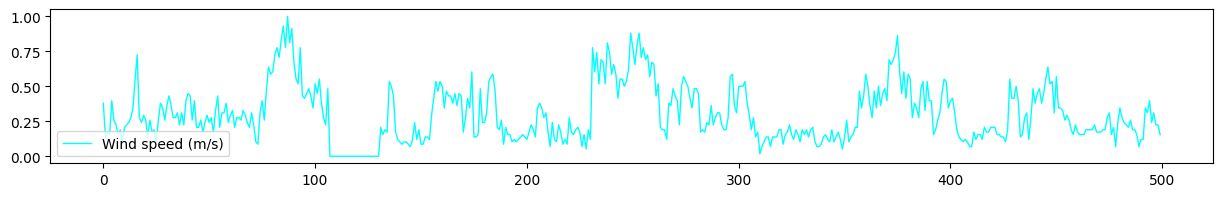

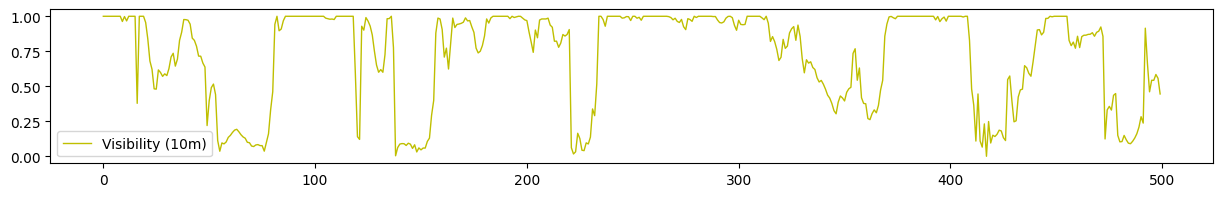

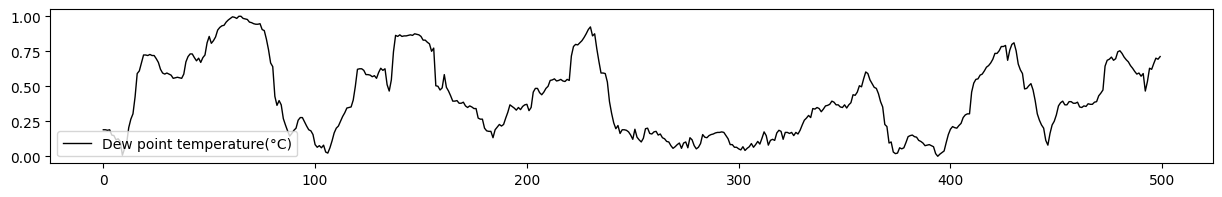

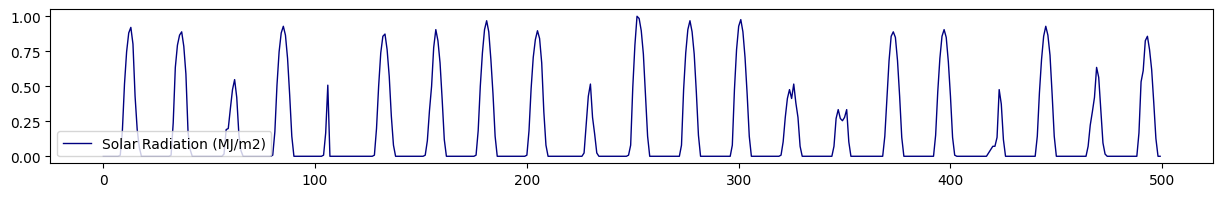

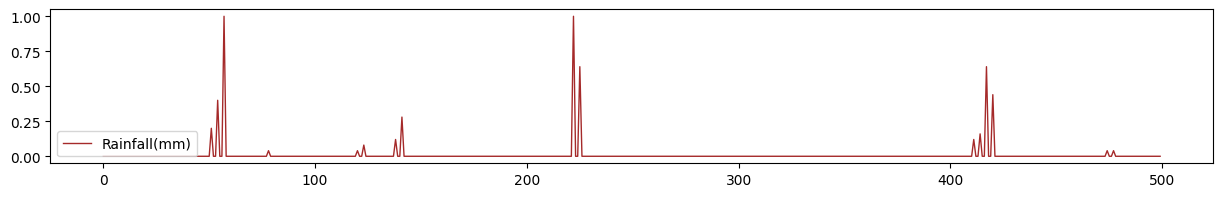

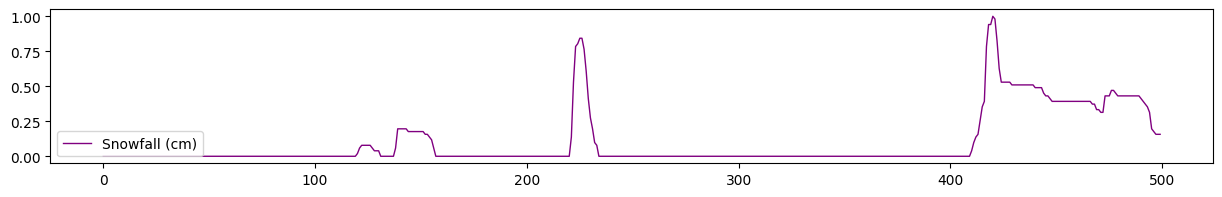

In [326]:
# MinMaxScaler to scale all values between 0 and 1
scaler = MinMaxScaler()

# For now I want to see the "signals" in the time series data
# so I am interested in the numerical columns and if I can see any patterns
# Then choose which columns would be good options for classification
# The cutoff means I am looking at the first 500 rows (not the whole data)
# and plot the values
cutoff = 500

# List of colours to get the graphs in different colours
colours = ["magenta", "red", "blue", "green", "orange", "cyan", "y", "black", "navy", "brown", "purple"]

# Go through the (numerical) columns of the dataframe
for i, col in enumerate(df.columns):
    # Checking if the df-column is numeric
    if np.issubdtype(df[col].dtype, np.number):
        fig, ax = plt.subplots(1, 1, figsize=(15, 2))
        
        # Get values in the current column until the cutoff point
        # and scale between 0 and 1 (only for the plotting part for now)
        y = df[[col]].iloc[:cutoff]
        y_scaled = scaler.fit_transform(y)

        # Set the x-axis values, so one step per row
        x = np.arange(0,cutoff)

        # Plot the data
        ax.plot(x,y_scaled, lw=1, c=colours[i], label=col)
        ax.legend(loc="lower left")
        plt.show()

In [327]:
# From the above graphs, I like the patterns of rented bike count, temperature, humidity and wind speed
# Maybe a bit sure about the windspeed, but I will include it for now
# So I choose those numeric columns as my target columns
# and scale the values
#target_cols_num = [1, 3, 4, 5]

# After fixing the issues with the predictions later on
# I decided that I want to train a second model to include extra columns
# For that reason I added three more (visibility, dew point temp and solar radiation)
target_cols_num = [1, 3, 4, 5, 6, 7, 8]
target_cols = df.columns[target_cols_num]
df[target_cols] = scaler.fit_transform(df[target_cols])
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,0.071429,0,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,0.057368,1,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,0.048650,2,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,0.030090,3,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,0.021935,4,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,0.282058,19,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,0.214848,20,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,0.195163,21,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,0.200225,22,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [328]:
# Keeping only the target columns
df = df[df.columns.intersection(target_cols)]
df["sequence"] = df.index + 1
df

C:\Users\tomco\AppData\Local\Temp\ipykernel_6464\3447859127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sequence"] = df.index + 1


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),sequence
0,0.071429,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,1
1,0.057368,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,2
2,0.048650,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,3
3,0.030090,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,4
4,0.021935,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,5
...,...,...,...,...,...,...,...,...
8755,0.282058,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,8756
8756,0.214848,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,8757
8757,0.195163,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,8758
8758,0.200225,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,8759


In [329]:
# Using pandas.melt() to flip the DataFrame into a more suitable format
df = pd.melt(df, id_vars=["sequence"], value_vars=target_cols,
             var_name="class", value_name="measurement")

In [330]:
# DataFrame now has just three convenient columns
# the sequence number, the class name and the measurement value (scaled)
df

,sequence,class,measurement
0,1,Rented Bike Count,0.071429
1,2,Rented Bike Count,0.057368
2,3,Rented Bike Count,0.048650
3,4,Rented Bike Count,0.030090
4,5,Rented Bike Count,0.021935
...,...,...,...
61315,8756,Solar Radiation (MJ/m2),0.000000
61316,8757,Solar Radiation (MJ/m2),0.000000
61317,8758,Solar Radiation (MJ/m2),0.000000
61318,8759,Solar Radiation (MJ/m2),0.000000


In [331]:
class_names = list(target_cols)

# I asked ChatGPT how to figure out the following mapping
# Because I wanted an approach that could be used with different numbers of classes
# Create a mapping from classes to numbers
class_mapping = {class_name: i for i, class_name in enumerate(class_names)}

In [332]:
# Apply the mapping function and replacing the class names with class numbers
df['class'] = df['class'].replace(class_mapping)
df

C:\Users\tomco\AppData\Local\Temp\ipykernel_6464\2239995666.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(class_mapping)


,sequence,class,measurement
0,1,0,0.071429
1,2,0,0.057368
2,3,0,0.048650
3,4,0,0.030090
4,5,0,0.021935
...,...,...,...
61315,8756,6,0.000000
61316,8757,6,0.000000
61317,8758,6,0.000000
61318,8759,6,0.000000


In [333]:
# Counting the number of classes
# and storing a list of the class numbers
num_classes = len(class_names)
classes = list(range(num_classes))

In [334]:
# Split the DataFrame into separate DataFrames
# and create a list of all the split dfs
splitted_dfs = []

for n in range(num_classes):
    df_class = df[df['class'] == n]
    splitted_dfs.append(df_class)

In [335]:
# Confirm that each dataframe has the same number (8760) of points
for frame in splitted_dfs:
    print(frame["class"].value_counts())

class
0    8760
Name: count, dtype: int64
class
1    8760
Name: count, dtype: int64
class
2    8760
Name: count, dtype: int64
class
3    8760
Name: count, dtype: int64
class
4    8760
Name: count, dtype: int64
class
5    8760
Name: count, dtype: int64
class
6    8760
Name: count, dtype: int64


In [336]:
# Dividing dataframe into timesteps
# I decided to go with 60 points per timestep as 8760 is nicely divisible by it
# making 146 timesteps

max_size = 8760
time_step_size = 60
x_total = []
y_total = []

# built x_total and y_total for all categories (7 at this point)
for category in classes:
    # Cutting the original signal data
    # starting from index 0
    index_cutoff = 0

    while index_cutoff / max_size < 1:
        timestep = []

        # take a slice of 60 points, starting from cutoff until cutoff + 60
        slice = splitted_dfs[category].iloc[index_cutoff:index_cutoff + time_step_size]
    
        # take a slice of selected category / signal type
        # and place it in x_total and y_total
        x_total.append(list(slice['measurement']))
        y_total.append(category)

        # after each sliced timestep data, raise the cutoff
        # by 60 (step size)
        index_cutoff += time_step_size

In [380]:
print(len(x_total))
print(len(y_total))

# 1022 slices in total
# If each category has 146 timesteps
# total number is the number of classes (7 in this case)
# multiplied by the number of timesteps
# 164 * 7 = 1022 - checks out!

print(len(x_total[0]))
# and 60 values per timestep as determined earlier

print(1022 * 60)
# and lastly, 1022 total timesteps by 60, the number of values per timestep
# makes 61320 - the number of total data points used for this classification

1022
1022
60
61320


In [338]:
# Randomize the data since it is still in the original sequence
# which is a problem if wanting to train a decent neural network

# Shuffle the x and y values together so that we don't 
# break the pairings between measurement and class

import random
zipped = list(zip(x_total, y_total))
random.shuffle(zipped)
x_total, y_total = zip(*zipped)

In [339]:
x_total = np.array(x_total)
y_total = np.array(y_total)

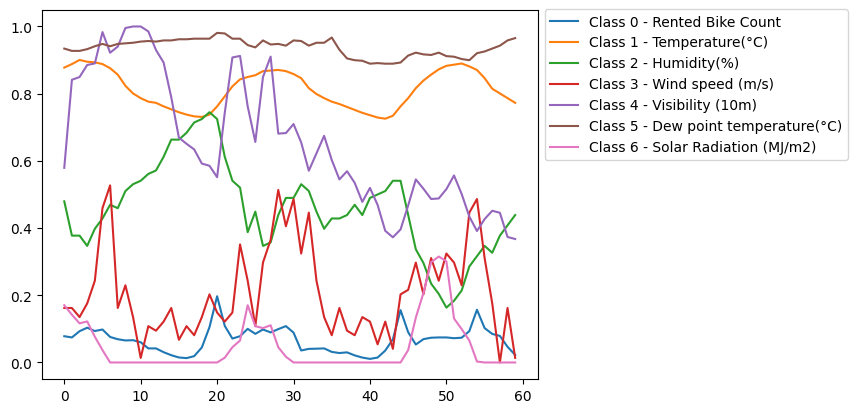

In [399]:
# Plotting a random signal from each category
for n in range(num_classes):
    c_x_train = x_total[y_total == n]
    plt.plot(c_x_train[4], label=f"Class {n} - {class_names[n]}")
    plt.legend(bbox_to_anchor=(1, 1.02))

In [341]:
# Train/test split - can be modified as desired
train_size = 0.8
splitter = int(len(x_total) * train_size)

# Split by index
x_train = x_total[0:splitter]
x_test = x_total[splitter:]
y_train = y_total[0:splitter]
y_test = y_total[splitter:]

In [342]:
# Verifying that the number of x and y values match between test and train data
# Otherwise the model training breaks
print(f"Length x_train, x_test:\n{len(x_train)}, {len(x_test)}")
print(f"Length y_train, y_test:\n{len(y_train)}, {len(y_test)}")


Length x_train, x_test:
817, 205
Length y_train, y_test:
817, 205


In [343]:
# Reshaping the data to match requirements of the CNN network
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [344]:
# Model with multiple convolutional layers + rest of the neural network
def make_model(input_shape):
    model = keras.Sequential(
        [
            keras.layers.Input(input_shape),

            # A convolutional layer
            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),

            # the same layer again, just much more convenient and concise
            keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l1_l2()),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(32, activation="relu"),

            # Output layer
            keras.layers.Dense(num_classes, activation="softmax")

        ]
    )

    return model

model = make_model(input_shape=x_train.shape[1:])

In [345]:
from IPython.display import clear_output
# Custom Callback for plotting the training data
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        # Make lists of the finished epochs and training metrics
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []    

        # Create a figure for the plots
        self.fig = plt.figure()

    def on_epoch_end(self, epoch, logs={}):
        # after each epoch, append the metrics to the lists
        self.x.append(epoch)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('sparse_categorical_accuracy'))
        self.val_acc.append(logs.get('val_sparse_categorical_accuracy'))

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

        clear_output(wait=True)
        
        # and then do the actual plotting
        ax1.plot(self.losses, label="loss")
        ax1.plot(self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.acc, label="accuracy")
        ax2.plot(self.val_acc, label="validation accuracy")
        ax2.legend()
        plt.show()

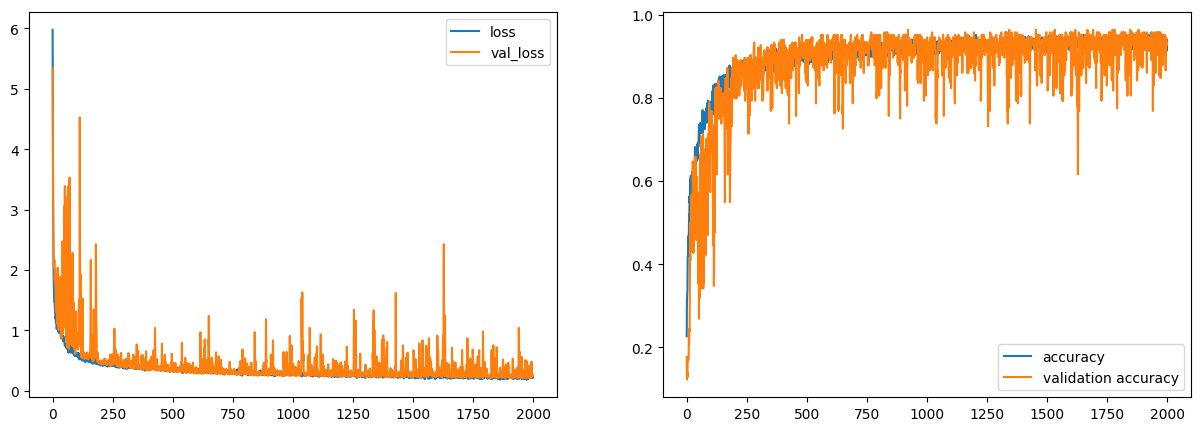

41/41 [==============================] - 0s 11ms/step - loss: 0.2181 - sparse_categorical_accuracy: 0.9357 - val_loss: 0.2494 - val_sparse_categorical_accuracy: 0.9268 - lr: 1.0000e-04


In [346]:
# Fitting the model, for this run I used a lot of epochs 
# because I wanted to see how good it can get
epochs = 2000
batch_size = 16

# Useful callbacks, typically for time series
# or CNN in general
# Model checkpoint for saving the best model
mc = ModelCheckpoint("best_model_extra.keras", monitor='val_loss', mode='min', save_best_only=True)

# Reducing the learning rate on plateau
rd_lr_op = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001)

# Early stop to stop the training early if it stops progressing
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100, verbose=1)
create_plots = CustomCallback()

# Creating a list of callbacks
callback_list = [mc, rd_lr_op, create_plots]

# A standard combination
# Using sparse categorical entropy here
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

# Model training
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callback_list,
    validation_split=0.2,
    verbose=1,
)

In [347]:
# At first I had the 4 basic classes and got around 80% accuracy 
# and almost 90% validation accuracy
# However, actual tests with predictions were not great and felt on par with random guesses
# Furthermore, the training graphs were often all over the place
# with validation accuracy frequently dipping down to 20%
# telling me that some things weren't right

# So I decided to change the model layers (added Dropout) and hyperparameters
# including the batch size and added a kernel regularizer
# and finally I got the training history to look normal
# The resulting training showed a much more stable trajectory with accuracies stabilizing
# But still - the predictions were terrible

# Finally I realised that I made a big mistake with testing the predictions
# The predictions were consistently wrong and didn't match up with the confusion matrix
# The reason was, that instead of doing the predictions correctly like this:
#test_batch = np.array([x_test[8]])
#test_predict = model.predict(test_batch)

# I did the following:
#test_predict = model.predict([x_test[8]])[0]

# Thus, instead of predicting one class for the whole timestep signal
# the model made predictions for each individual value within the timestep - 60 in total
# a good reminder to sometimes take a step away from what you're doing 
# and think about what is really going wrong
# Also that it's important to understand what the code is doing

In [348]:
# Load the best model from model checkpoint
# best_model.keras is the model for 4 classes
# best_model_extra.keras is for 7 numeric classes
model = keras.models.load_model("best_model_extra.keras")

# Comparing the model's loss/accuracy/evaluation values between train and test
print("Test data evaluation:")
print(model.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(x_train, y_train, verbose=0))

# Quite close, I'm satisfied with these metrics

Test data evaluation:
[0.24145261943340302, 0.9512194991111755]

Train data evaluation:
[0.163913294672966, 0.9596083164215088]


In [349]:
# Make predictions and use argmax to get the most likely class
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

7/7 [==============================] - 0s 2ms/step


<Axes: >

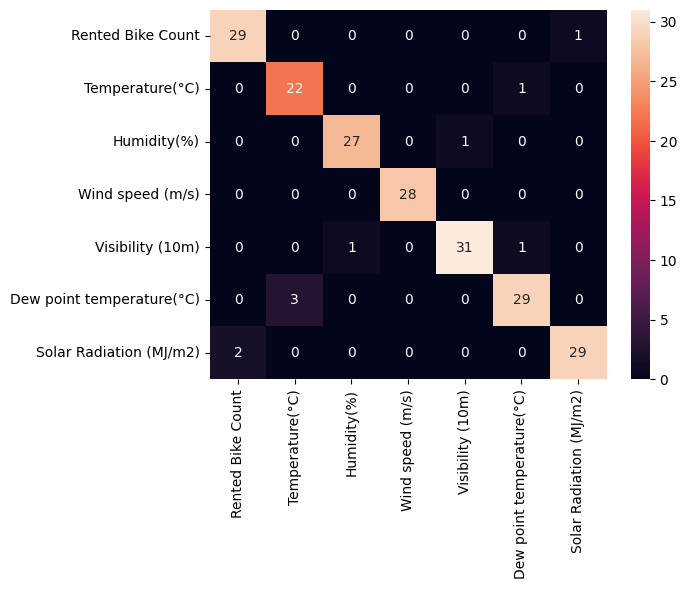

In [350]:
# Confusion matrix heatmap with category names
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g')

# After some final optimisations, the confusion matrix looks very good
# Biggest number of mistakes was with temperature and dew point temperature
# Which is quite understandable, as they are pretty closely related

In [351]:
# Classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=class_names))

# Printing overall accuracy of the model in a nicer format
acc = accuracy_score(y_test, test_predictions)
print("\nOverall model accuracy: {:.2f}%".format(acc * 100))

# Computing the ROC-AUC -score
# Because I have more than two classes, using "ovr" - one vs. rest ROC
print("ROC-AUC-score: {}".format(round(roc_auc_score(y_test, model.predict(x_test), multi_class="ovr"), 5)))

# Model accuracy is about 95%, ROC-AUC-score at 99.6 also satisfactory
# I am honestly relieved that not only was the 4-classes model better than I thought
# Even with 7 classes the resulting model is much better than originally anticipated
# I would say that this would totally be usable in real life
# since I think I would do worse guessing the classes of the timestep signals

                           precision    recall  f1-score   support

        Rented Bike Count       0.94      0.97      0.95        30
          Temperature(°C)       0.88      0.96      0.92        23
              Humidity(%)       0.96      0.96      0.96        28
         Wind speed (m/s)       1.00      1.00      1.00        28
         Visibility (10m)       0.97      0.94      0.95        33
Dew point temperature(°C)       0.94      0.91      0.92        32
  Solar Radiation (MJ/m2)       0.97      0.94      0.95        31

                 accuracy                           0.95       205
                macro avg       0.95      0.95      0.95       205
             weighted avg       0.95      0.95      0.95       205


Overall model accuracy: 95.12%
7/7 [==============================] - 0s 2ms/step
ROC-AUC-score: 0.99563


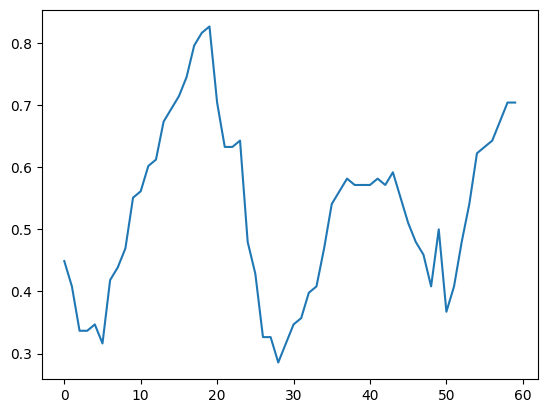

Actual signal: Humidity(%)
Predicted: Humidity(%)

Predicted probability by class:
Rented Bike Count: 0.0 %
Temperature(°C): 0.0 %
Humidity(%): 99.08 %
Wind speed (m/s): 0.0 %
Visibility (10m): 0.89 %
Dew point temperature(°C): 0.03 %
Solar Radiation (MJ/m2): 0.0 %


In [453]:
# Testing predictions from the test data
# First visualising and testing a single signal
# Then testing a series of signals

# Manually choosing a signal
signal_index = 27
test_batch = np.array([x_test[signal_index]])

# Plot the figure for randomly chosen signal
plt.figure()
plt.plot(x_test[signal_index])
plt.show()

# True signal class
print(f"Actual signal: {class_names[y_test[signal_index]]}")

# Prediction for this signal
test_predict = model.predict(test_batch, verbose=0)
print(f"Predicted: {class_names[np.argmax(test_predict)]}\n")
print("Predicted probability by class:")

# Reduce dimension of the array and convert to a standard list
probs = test_predict.squeeze().tolist()

# Convert to more readable format
probs = [round(num * 100, 2) for num in probs]
for i, prob in enumerate(probs):
    print(f"{class_names[i]}: {prob} %")

# The actual predictions are looking really good after figuring out the mistake I did originally

<Axes: >

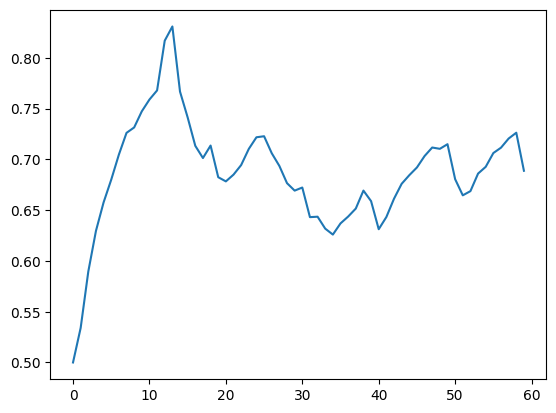

In [922]:
# Creating fake data to mimic some of the data
# and trying to see what the model predicts
# I also tried asking ChatGPT to generate a dummy signal
# It was quite challenging to get what I wanted, so I manually continued
# and tried to make a random signal creator that would be somewhat similar to temperature
# Sadly it doesn't work that well
# But after some tries it's usually possible to get something
# that looks kinda like a temperature graph

# Set the number of points
num_points = 60

# X values from 0 to 60
x = np.arange(num_points)

# Initialize y values with a starting point of 0.3
y = np.full(num_points, 0.5)

# Set the initial direction of y (1 for increasing, -1 for decreasing)
direction = np.random.choice([-1,1])
# Set the probability of changing direction
plateau = False

for i in range(1, num_points):
    rand_num = np.random.random()
    noise = np.random.uniform(0.005, 0.02)
    change = direction * np.random.uniform(0.005, 0.05)
    y[i] = y[i - 1] + change + noise

    if plateau == True and rand_num < 0.25:
        plateau = False
    elif plateau == True:
        y[i] = y[i - 1] + noise

    # Chance to create a plateau
    elif rand_num < 0.25:
        plateau = True
    if y[i - 1] < 0.3:
        y[i] += change + noise
        direction = 1

    elif y[i - 1] > 0.8:
        y[i] += change - noise
        direction = -1



# Plot to see how it looks
sns.lineplot(x=x, y=y)

In [924]:
# Getting the model prediction
points = y
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])
# Prediction for this signal
test_predict = model.predict(test_batch, verbose=0)
print(f"Predicted: {class_names[np.argmax(test_predict)]}\n")
print("Predicted probability by class:")

# Reduce dimension of the array and convert to a standard list
probs = test_predict.squeeze().tolist()

# Convert to more readable format
probs = [round(num * 100, 2) for num in probs]
for i, prob in enumerate(probs):
    print(f"{class_names[i]}: {prob} %")

Predicted: Temperature(°C)

Predicted probability by class:
Rented Bike Count: 0.0 %
Temperature(°C): 95.33 %
Humidity(%): 0.15 %
Wind speed (m/s): 0.0 %
Visibility (10m): 0.04 %
Dew point temperature(°C): 4.48 %
Solar Radiation (MJ/m2): 0.0 %


In [ ]:
# Final thoughts
# Time series data is hard, difficult to find something fitting a specific need
# difficult to use (compared to other data)
# Analysing with time steps has its own pitfalls
# Like the step size and some differences for how to think about
# the model hyperparameter tuning
# Thinking back, I probably should have taken a step size divisible by 24
# so that the daily patterns do not go out of sync
# But 60 is exactly 2.5 days, so that's why it probably wasn't that big of a deal
# It also has the big constraint of requiring an underlying pattern
# meaning some kind of interrelated patterns or trends in the data
# The stronger the noise and weaker the underlying patterns are, the more difficult it is to train a model
# But I think there is a lot of potential to find creative solutions with it
# Things that have repeating or reoccurring patterns where one wouldn't expect it
# So while it isn't as intuitive to do timeseries classification, it has a lot of potential
# In particular because humans might quickly be overwhelmed by the amount of data points
# E.g. for predictive maintenance (also medicine, predicting health related factors)
# using the acoustic fingerprint to analyse if a machine is starting to become defective
# I think time series classification could work for that
# For a human, the threshold for when they can recognise that the machine sounds off might be a lot later
# Another thing to track with timeseries would be all sorts of activity, be it customer demand throughout the year/day
# Network traffic monitoring and weather forecasts are also good potential applications
# There is an interesting weather forecasting model I read about, which I found insightful:
# https://deepmind.google/discover/blog/graphcast-ai-model-for-faster-and-more-accurate-global-weather-forecasting/
# While it doesn't eliminate the need for traditional models, Graphcast can make useful weather forecasts based on data alone
# Basically, it manages to predict something decently well without being designed to actually simulate how weather works
# Of course the holy grail for time series with ML would be to predict stock prices
# While that might be near impossible, I think it still could help in slightly different ways
# e.g. predicting early if the economy is heading into a recession or an upturn
# In summary: Lots of room for potential applications, but whether an application is feasible or not
# is very difficult to tell in advance